1주차

Add Noise
- Salt & pepper noise
- White Gaussian noise

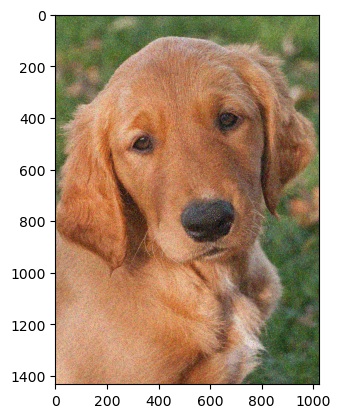

In [13]:
import numpy as np
from skimage import io
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt

img = io.imread ("/Users/jiyoung/Desktop/univ/'23-2/Engineering Design/workspace/dog.jpeg")
img = img/255.0
image = img

from skimage.util import random_noise
# Step 1: Add salt and pepper noise
salt_pepper_image = random_noise(img, mode='s&p', amount=0.1)
#plt.imsave('salt_pepper_image.png', salt_pepper_image)

# Step 2: Add additive white Gaussian noise
mean = 0
var = 0.01
std = np.sqrt(var)
gaussian_noise = np.random.normal(mean, std, salt_pepper_image.shape)
noisy_image = salt_pepper_image + gaussian_noise

# Clip the pixel values to be in the [0, 1] range
noisy_image = np.clip(noisy_image, 0., 1.0)
#plt.imsave('noisy_image.png', noisy_image)
plt.imshow(noisy_image)

How to calculate PSNR

In [14]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

print("**원본 이미지, 원본 psnr 비교**")
print("PSNR :", peak_signal_noise_ratio(img, image))

print("**원본 이미지, s&p image psnr 비교**")
print("PSNR :", peak_signal_noise_ratio(img, salt_pepper_image))
          
print("**원본 이미지, s&p noise image + WG noise image 비교**")
print("PSNR :", peak_signal_noise_ratio(img, noisy_image))

**원본 이미지, 원본 psnr 비교**
PSNR : inf
**원본 이미지, s&p image psnr 비교**
PSNR : 15.262598944275727
**원본 이미지, s&p noise image + WG noise image 비교**
PSNR : 14.562760735394022


/Users/jiyoung/Downloads/yes/envs/3.8/lib/python3.8/site-packages/skimage/metrics/simple_metrics.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


2주차

Lets Make median filter, gaussian filter

median filter 
For salt & pepper noise

gaussian filter
For white gaussian nopise

/var/folders/n1/t3hm6b612gg69mlfjrdv4ht00000gn/T/ipykernel_67372/1697392134.py:6: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=True))
/var/folders/n1/t3hm6b612gg69mlfjrdv4ht00000gn/T/ipykernel_67372/1697392134.py:7: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image_bilateral = denoise_bilateral(noisy_image, sigma_color=0.7, sigma_spatial=7, multichannel=True)


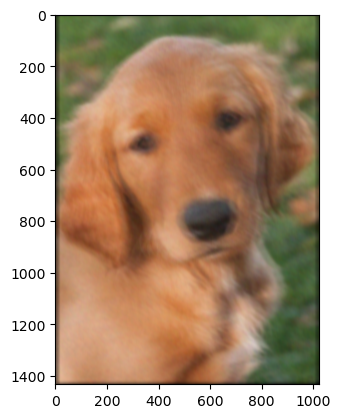

In [21]:
# # salt and pepper denoising
# from skimage.restoration import denoise_bilateral, denoise_wavelet, denoise_tv_chambolle, denoise_nl_means, estimate_sigma
# from skimage import img_as_float, img_as_ubyte

# # Step 3: Denoise the image using bilateral filter
# sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=True))
# for i in range(0, 3):
#     denoised_image_bilateral = denoise_bilateral(noisy_image, sigma_color=0.1, sigma_spatial=15, multichannel=True)
#     noisy_image = denoised_image_bilateral

# sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=True))
# denoised_image_bilateral = denoise_bilateral(noisy_image, sigma_color=0.7, sigma_spatial=7, multichannel=True)

# plt.imsave('denoised_image_bilateral.png', denoised_image_bilateral)
# plt.imshow(denoised_image_bilateral)

In [20]:
print("**원본 이미지, 원본 psnr 비교**")
print("PSNR :", peak_signal_noise_ratio(img, image))

print("**원본 이미지, s&p image psnr 비교**")
print("PSNR :", peak_signal_noise_ratio(img, salt_pepper_image))
          
print("**원본 이미지, s&p noise image + WG noise image 비교**")
print("PSNR :", peak_signal_noise_ratio(img, noisy_image))

print("**원본 이미지, s&p noise image + WG noise image 비교**")
print("PSNR :", peak_signal_noise_ratio(img, denoised_image_bilateral))

**원본 이미지, 원본 psnr 비교**
PSNR : inf
**원본 이미지, s&p image psnr 비교**
PSNR : 15.262598944275727
**원본 이미지, s&p noise image + WG noise image 비교**
PSNR : 14.562760735394022
**원본 이미지, s&p noise image + WG noise image 비교**
PSNR : 24.164593925259


In [ ]:
# def median_filter_for_image(image, size=3):
#     denoised_image = np.zeros_like(image)
#     for channel in range(image.shape[2]):
#         denoised_image[:, :, channel] = np.median(image[:, :, channel], size=(size, size))
#     return denoised_image

# # Load the image
# img = io.imread("/Users/jiyoung/Desktop/univ/'23-2/Engineering Design/workspace/dog.jpeg")
# img = img / 255.0

# # Step 1: Add salt and pepper noise
# salt_pepper_image = random_noise(img, mode='s&p', amount=0.1)

# # Apply median filter to remove salt and pepper noise
# denoised_image = median_filter_for_image(salt_pepper_image, size=3)

# # Clip the pixel values to be in the [0, 1] range
# denoised_image = np.clip(denoised_image, 0., 1.0)

# # Display the images
# plt.subplot(131), plt.imshow(img), plt.title('Original Image')
# plt.subplot(132), plt.imshow(salt_pepper_image), plt.title('Noisy Image')
# plt.subplot(133), plt.imshow(denoised_image), plt.title('Denoised Image')
# plt.show()

# # Convert the images to uint8 before calculating PSNR
# img = (img * 255).astype(np.uint8)
# denoised_image = (denoised_image * 255).astype(np.uint8)

# # Print PSNR after applying median filter
# print("**원본 이미지, noisy image + Median Filter 비교**")
# print("PSNR:", peak_signal_noise_ratio(img, denoised_image))

TypeError: _median_dispatcher() got an unexpected keyword argument 'size'